# Predicts the average housing price in each neighbourhood

In [1]:
import math
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#import scipy.stats as stats
#plt.rc('figure', figsize=(10, 6))
#%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df=pd.read_excel('kwb-2016_del_col_del_row.xls', decimal=",")
df.size

17346

<b>Problem 1: Data Preparation</b>

a) Clean the data

In [3]:
#1. Drop missing values
df.replace('.', np.nan, inplace=True)
df.dropna(how='any', inplace=True)

#2. Select neighborhoods
df = df[df['recs']=='Buurt']

#3. Create Y var
# Transform all numerical columns into float64
df.iloc[0:, 6:] = df.iloc[0:, 6:].astype(np.float64)
# Calculate Y
y = np.log(df['g_woz'])

#4. Create X var
X = df.iloc[0:, 6:]
X.drop('g_woz', axis=1, inplace=True)
# All numeric columns in X such that each row corresponds to a single geographic unit
X = np.array(X)

#5. Normalize X
X = preprocessing.normalize(X)

df.size

12095

b) Create train-test split [the split is 0.25/0.75 by default]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

c) What happens to the importance of regularization as the size of the training set increases? Why?

- Its importance drops because there is enough data to prevent overfitting
- Regularization prevents overfitting 
- "Very large weights (w) that fit the training data very well, but poorly predict future data. "Regularization” means modifying the optimization problem to prefer small weights (w)"

<b>Problem 2: Linear Regression</b>

In [5]:
from sklearn.linear_model import LinearRegression
score = cross_val_score(LinearRegression(), X_train, y_train, cv=10)
score
print ("LinearRegression average performance: {: .3f}".format(score.mean()))

array([0.68845342, 0.75459858, 0.84477035, 0.56804534, 0.71365288,
       0.58096881, 0.12695587, 0.7739911 , 0.54208819, 0.60190247])

LinearRegression average performance:  0.620


<b>Problem 3: Ridge and Lasso Regression</b>

a) Ridge Regression

In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha':np.logspace(-6,3,num=10)}
grid_search_ridge = GridSearchCV(Ridge(), param_grid, return_train_score = True, cv=10).fit(X_train, y_train)

print ("Best performance: the mean cross-validation accuracy on the training set) {: .3f}".format(grid_search_ridge.best_score_))
print ("Best param: corresponding param ", grid_search_ridge.best_params_)

Best performance: the mean cross-validation accuracy on the training set)  0.625
Best param: corresponding param  {'alpha': 1e-05}


b) Lasso Regression

In [7]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha':np.logspace(-6,3,num=10)}
grid_search_lasso = GridSearchCV(Lasso(max_iter=1000), param_grid, return_train_score = True, cv=10).fit(X_train, y_train)

print ("Best performance: the mean cross-validation accuracy on the training set) {: .3f}".format(grid_search_lasso.best_score_))
print ("Best param: corresponding param ", grid_search_lasso.best_params_)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Best performance: the mean cross-validation accuracy on the training set)  0.609
Best param: corresponding param  {'alpha': 1e-06}


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


<b>Problem 4: Visualize performance</b>

a) Plot the average R^2 for train and test data set for Ridge/Lasso Regression models

In [8]:
ridge_train_scores = grid_search_ridge.cv_results_['mean_train_score']
ridge_test_scores = grid_search_ridge.cv_results_['mean_test_score']

lasso_train_scores = grid_search_lasso.cv_results_['mean_train_score']
lasso_test_scores = grid_search_lasso.cv_results_['mean_test_score']

Text(0.5,1,'Model Performance')

Text(0.5,0,'$\\alpha$ (alpha)')

Text(0,0.5,'Score')

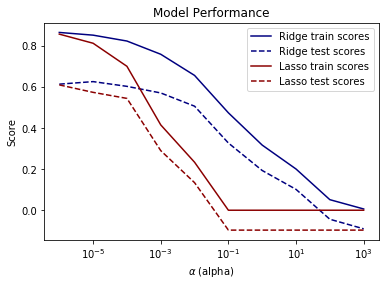

In [9]:
alphas = np.logspace(-6,3,num=10)

plt.figure()
plt.title('Model Performance')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')

plt.semilogx(alphas, ridge_train_scores, color='navy', label="Ridge train scores")
plt.semilogx(alphas, ridge_test_scores, '--', color='navy', label="Ridge test scores")
plt.semilogx(alphas, lasso_train_scores, color='darkred', label="Lasso train scores")
plt.semilogx(alphas, lasso_test_scores, '--', color='darkred', label="Lasso test scores")

plt.legend(loc='best')

b) We can conclude that Ridge is a better fit for this training set than Lasso, for each 'alpha' considered in the cross-validation. Also, considering the data analized above:

Ridge<br>
R^2 = 0.625<br>
alpha = 1e-05<br>

Lasso<br>
R^2 = 0.609<br>
alpha = 1e-06<br>

Therefore, <b>Ridge</b> provides a better prediction with a score of <b>R^2 = 0.625</b> and <b>alpha = 1e-05</b>.

c) Coeffients set to zero in the best Ridge/Lasso estimator 

In [10]:
r = grid_search_ridge.best_estimator_.coef_
print ("Coefficients set to zero in the best Ridge model: ", (r == 0).sum())

l = grid_search_lasso.best_estimator_.coef_ 
print ("Coefficients set to zero in the best Lasso model: ", (l == 0).sum())

Coefficients set to zero in the best Ridge model:  0
Coefficients set to zero in the best Lasso model:  2


<b>Problem 5: Visualize the coefficients</b>

a) Ridge regression coefficient profiles

In [11]:
r_coefs = []
for alpha in np.logspace(-6,3,num=10):
    #fit the model for each alpha
    coef = Ridge(alpha=alpha).fit(X_train, y_train).coef_
    r_coefs.append(coef) 

Text(0.5,1,'Ridge coefficient profiles')

Text(0.5,0,'$\\alpha$ (alpha)')

Text(0,0.5,'Coefficient')

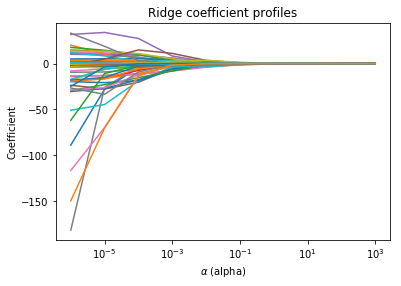

In [12]:
alphas = np.logspace(-6,3,num=10)

plt.figure()
plt.title('Ridge coefficient profiles')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Coefficient')

plt.semilogx(alphas, r_coefs)

b) Lasso regression coefficient profiles

In [13]:
l_coefs = []
for alpha in np.logspace(-6,3,num=10):
    #fit the model for each alpha
    coef = Lasso(alpha=alpha).fit(X_train, y_train).coef_
    l_coefs.append(coef) 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0.5,1,'Lasso coefficient profiles')

Text(0.5,0,'$\\alpha$ (alpha)')

Text(0,0.5,'Coefficient')

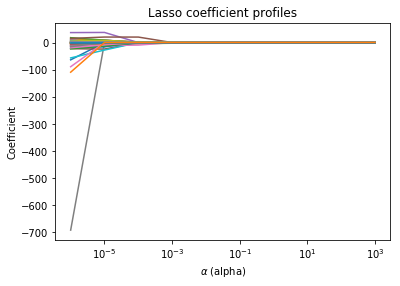

In [14]:
alphas = np.logspace(-6,3,num=10)

plt.figure()
plt.title('Lasso coefficient profiles')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Coefficient')

plt.semilogx(alphas, l_coefs)

c) Interpretation: <br>
Ridge uses a L2 regularization, for which a small alpha allows coefficients to be less restrictive <br>
Whereas, Lasso uses an L1 regularization, where even small alphas force some coefficients to be exact zero

<b>Problem 6: Classification problem</b>

a) Classification problem: Low vs High house prices in a particular city/neighbourhood

In [15]:
#Create a new column which contains the class label - y, the taget variable, with the following assumptions:
#1. Class 0 represents low price properties; Class 1 represents high price properties
#2. The class label is calculated based on the WOZ value: 
#   if WOZ value is less than threshold, then the record is a class 0 element 
#   if WOZ value is higher than threshold, then the record is a class 1 element 
#3. The class boundary, the threshold, is considered to be the mean price of all data points 
threshold = df['g_woz'].mean()
df["price"] = np.where(df['g_woz']<=threshold, 0, 1)

#Select a particular city
#df2 = df[df["gm_naam"]=='Amsterdam']
#OR Use the entre dataset
df2 = df

df2.size

12300

b) K-nearest neighbours classifier

In [16]:
#Create Y2 var
y2 = df2["price"]

#Create X2 var
X2 = df2.iloc[0:, 6:]
X2.drop('price', axis=1, inplace=True)
X2 = np.array(X2)

#Normalize X2
X2 = preprocessing.normalize(X2)

#Create train-test split 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=10)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5).fit(X2_train, y2_train)

print ("KNeighborsClassifier train set score: {: .3f}".format(knn.score(X2_train, y2_train)))
print ("KNeighborsClassifier test set score: {: .3f}".format(knn.score(X2_test, y2_test)))


KNeighborsClassifier train set score:  0.837
KNeighborsClassifier test set score:  0.712


c) Linear models for classification: Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(C=1500).fit(X2_train, y2_train)

print ("LogisticRegression train set score: {: .3f}".format(lgr.score(X2_train, y2_train)))
print ("LogisticRegression test set score: {: .3f}".format(lgr.score(X2_test, y2_test)))


LogisticRegression train set score:  0.948
LogisticRegression test set score:  0.865


d) Which model works best and why?

<b>LogisticRegression</b> provides a better performance, by adjusting the regularization parameter to C = 1500. As a result we get high scores for both training and test sets, 0.95 and 0.86 respectively. 


The K-nearest neighbours classifier provides a much lower score, LogisticRegression. Complexity of the model being asjused thigh the number of neighbours considered.